**Variables**

In [2]:
df_ventas, df_ventas_limpio="",""

**Librerías**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings
#warnings.filterwarnings('ignore')


**Obtención de Datos**

Obtención de datos

Crea una función obtencion_datos(), dentro de ella, define nuevamente las variables globales(ver Paso1) y escribe tu código:

Obtención de los datos: Con la ayuda del método read_csv carga tu archivo "reporte_ventas.csv" dentro de la variable global df_ventas.

Formatar columnas de fechas: Con la ayuda del método pd.to_datetime transforma las columnas 'fecha_pedido' y 'fecha_envio' que se encuentran como_ texto a formato datetime_ usando el siguiente formato format='%Y-%m-%d'.

Elimina Repetidos: Elimina todos los registros duplicados con el método drop_duplicates() y guarda el resultado en la variable global df_ventas_limpio.

Elimina filas con registros de prueba de la base: Elimina todos los registros cuyo valor sea igual a 'prueba' en la columna 'nombre_cliente', continúa guardando el resultado en df_ventas_limpio.

Elimina filas con valor nulo en la columna nombre_cliente: Elimina todos los registros cuyo valor sea nulo en la columna 'nombre_cliente', continúa guardando el resultado en df_ventas_limpio.

Filtra operaciones sin ganancia: Quédate sólo con los registros que tengan un valor mayor a cero en la columna 'total_ganancia', continúa guardando el resultado en df_ventas_limpio.

Actualiza el indice: Utilizando el método reset_index actualiza el índice del dataframe final df_ventas_limpio.



In [2]:
def obtencion_datos():
    global df_ventas
    df_ventas = pd.read_csv("reporte_ventas.csv")
    print("Datos obtenidos:")
    print(df_ventas.head())

def formatear_columnas_fechas():
    global df_ventas
    df_ventas['fecha_pedido'] = pd.to_datetime(df_ventas['fecha_pedido'], format='%Y-%m-%d')
    df_ventas['fecha_envio'] = pd.to_datetime(df_ventas['fecha_envio'], format='%Y-%m-%d')
    print("Columnas de fechas formateadas:")
    print(df_ventas.head())

def eliminar_repetidos():
    global df_ventas_limpio
    df_ventas_limpio = df_ventas.drop_duplicates()
    print("Repetidos eliminados:")
    print(df_ventas_limpio.head())

def eliminar_filas():
    global df_ventas_limpio
    df_ventas_limpio = df_ventas_limpio[df_ventas_limpio['nombre_cliente'] != 'prueba']
    print("Filas con 'prueba' eliminadas:")
    print(df_ventas_limpio.head())

def eliminar_registros_nulos():
    global df_ventas_limpio
    df_ventas_limpio = df_ventas_limpio.dropna(subset=['nombre_cliente'])
    print("Registros nulos eliminados:")
    print(df_ventas_limpio.head())

def filtrar_operaciones_con_ganancia():
    global df_ventas_limpio
    df_ventas_limpio = df_ventas_limpio[df_ventas_limpio['total_ganancia'] > 0]
    print("Operaciones sin ganancia filtradas:")
    print(df_ventas_limpio.head())

def resetear_indice():
    global df_ventas_limpio
    df_ventas_limpio = df_ventas_limpio.reset_index(drop=True)
    print("Índice reseteado:")
    print(df_ventas_limpio.head())

obtencion_datos()
formatear_columnas_fechas()
eliminar_repetidos()
eliminar_filas()
eliminar_registros_nulos()
filtrar_operaciones_con_ganancia()
resetear_indice()

obtencion_datos()
print('información:')
print(df_ventas_limpio.info())
print('------------')
print(df_ventas_limpio.duplicated().sum())
print('------------')
print('registros de prueba:')
print((df_ventas_limpio['nombre_cliente'] == 'prueba').sum ())
print('------------')
print('registros con ganancia <=0:')
print((df_ventas_limpio['total_ganancia'] <= 0).sum ())


Datos obtenidos:
  fecha_pedido fecha_envio        modo_envio     nombre_cliente  \
0   2021-11-09  2021-11-12         Económico    Thiago Silveira   
1   2021-11-09  2021-11-12         Económico    Thiago Silveira   
2   2021-06-13  2021-06-17         Económico      Giovanna Lima   
3   2020-10-12  2020-10-19  Entrega estándar  Ana Júlia da Cruz   
4   2020-10-12  2020-10-19  Entrega estándar  Ana Júlia da Cruz   

  segmento_cliente          ciudad          estado   region  \
0              B2C  Ribeirão Preto       São Paulo  Sureste   
1              B2C  Ribeirão Preto       São Paulo  Sureste   
2              B2B  Rio de Janeiro  Rio de Janeiro  Sureste   
3              B2C   Foz do Iguaçu          Paraná      Sur   
4              B2C   Foz do Iguaçu          Paraná      Sur   

   departamento_producto             tipo_producto  precio_base  \
0                   Ropa                 Camisetas       409.70   
1                   Ropa                     Jeans       705.10   


**Pregunta 1**

      total_venta   año
0          890.66  2021
1         2488.59  2021
2           49.72  2021
3           76.04  2020
4          166.11  2019
...           ...   ...
7205       123.22  2021
7206       271.97  2022
7207       700.75  2022
7208        85.83  2019
7209       826.74  2022

[7210 rows x 2 columns]
    año  total_venta
0  2019   1052735.86
1  2020   1190541.40
2  2021   1535801.44
3  2022   1825927.50


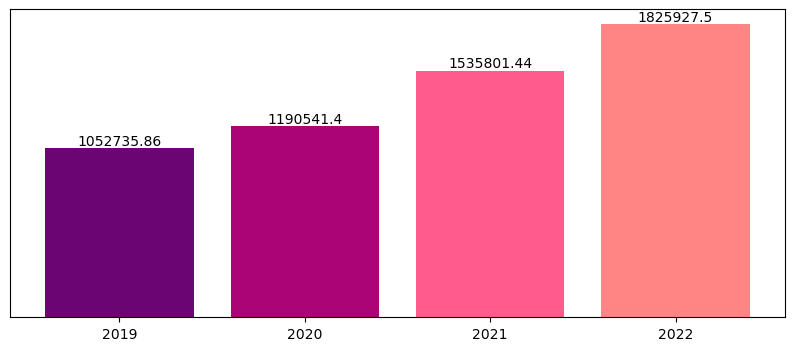

In [3]:
def pregunta_1():
    global df_ventas
    global df_ventas_año
    global df_ventas_limpio
    global df_ventas_año_agrupado

    df_ventas_año=df_ventas_limpio[['fecha_pedido', 'total_venta']].copy()

   # Crea una nueva columna llamada 'año' con el año de 'fecha_pedido'
    df_ventas_año['año'] = df_ventas_año['fecha_pedido'].dt.year

    # Elimina la columna 'fecha_pedido'
    df_ventas_año = df_ventas_año.drop('fecha_pedido', axis=1)

    # Muestra el DataFrame resultante
    print(df_ventas_año)

    df_ventas_año_agrupado = df_ventas_año.groupby('año').aggregate({'total_venta': 'sum'}).reset_index()

    # Muestra el DataFrame resultante
    print(df_ventas_año_agrupado)
    fig, ax = plt.subplots(figsize=(10,4))
    
    ax.bar(df_ventas_año_agrupado["año"], df_ventas_año_agrupado["total_venta"], color=colores, width=0.8)
    for bar in ax.patches:
      valor = bar.get_height()
      qtd = f"{valor}"
      ax.text(bar.get_x() + bar.get_width() / 2.0, valor, qtd, ha='center', va='bottom')
    # Establecer el formato de los ticks del eje x como enteros
    ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))   
# Colores para las barras
    ax.set_yticks([]) 
colores = ['#6a0573', '#ab0476', '#ff5c8d', '#ff8484', '#ffc75f']

pregunta_1()

**Pregunta 2**

In [12]:
def pregunta_2():
    global df_ventas_limpio
    global df_top_ganancias

    # Crear una copia de df_ventas_limpio con solo las columnas 'tipo_producto' y 'total_ganancia'
    df_top_ganancias = df_ventas_limpio[['tipo_producto', 'total_ganancia']].copy()

    # Agrupar por 'tipo_producto', sumarizar 'total_ganancia' y ordenar los resultados
    df_top_ganancias = df_top_ganancias.groupby('tipo_producto').aggregate({'total_ganancia': 'sum'}).sort_values('total_ganancia', ascending=False)

    # Seleccionar los primeros 7 registros
    df_top_ganancias = df_top_ganancias.head(7)


pregunta_2()

print(df_top_ganancias)

                       total_ganancia
tipo_producto                        
Lámparas LED                111453.41
Laptops                      91148.67
Cámaras digitales            80192.63
Smartphones                  64705.58
Jeans                        55982.95
Detergente para ropas        55766.39
Bolsas de basura             53328.46


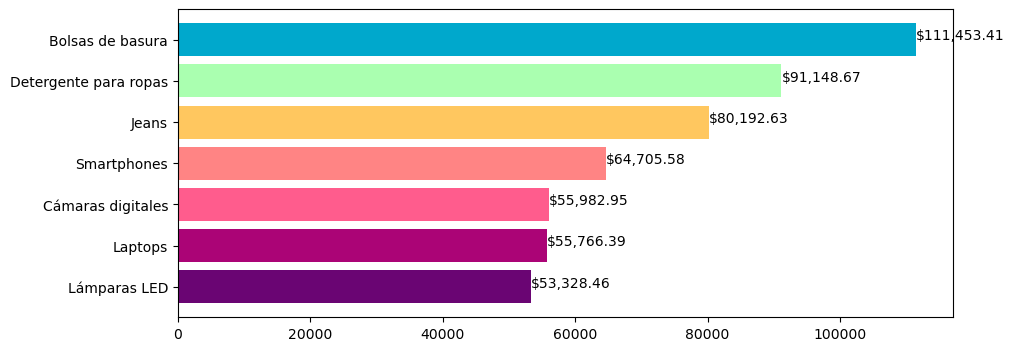

In [42]:
# Colores para las barras
colores = ['#6a0573', '#ab0476', '#ff5c8d', '#ff8484', '#ffc75f', '#aaffb0', '#00a8cc']


# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 4))

# Crear el gráfico de barras horizontal
ax.barh(df_top_ganancias.index, df_top_ganancias['total_ganancia'][::-1], color=colores, align='center')

# Colocar los valores sobre cada barra
for i, valor in enumerate(df_top_ganancias['total_ganancia'][::-1]):
    qtd = f'${valor:,.2f}'  # Formatea el valor como texto con símbolo de dólar y dos decimales
    ax.text(valor, i, qtd)

# Mostrar el gráfico
plt.show()

**Pregunta 3**

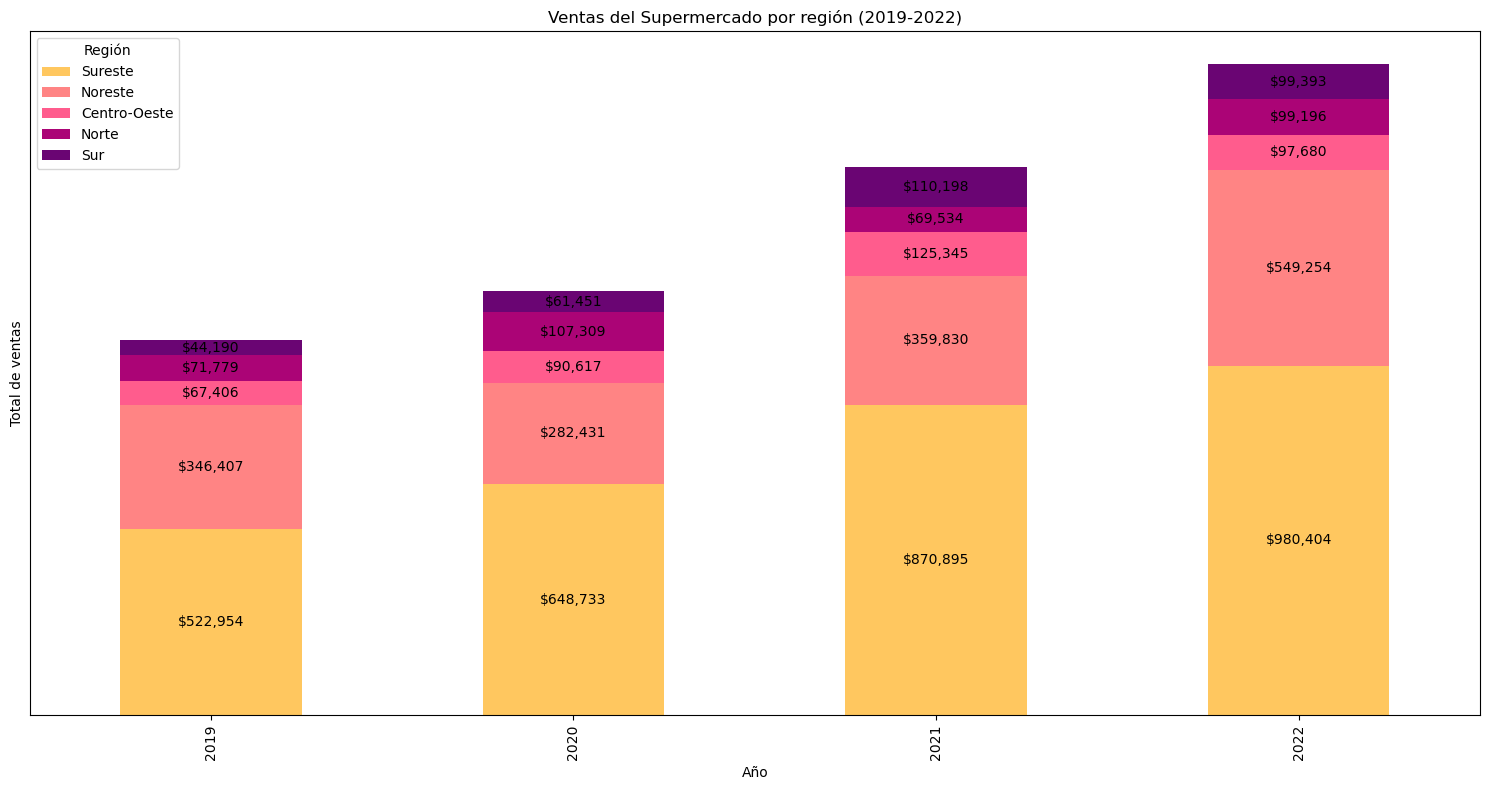

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

def pregunta_3():
    # Definir las variables globales según las instrucciones
    global df_ventas, df_ventas_limpio

    # Convertir 'fecha_pedido' a datetime si aún no se ha hecho
    df_ventas_limpio['fecha_pedido'] = pd.to_datetime(df_ventas_limpio['fecha_pedido'])

    # 1. Preparación de los datos
    # Crear una copia de df_ventas_limpio con solo las columnas especificadas
    df_ventas_año_region = df_ventas_limpio[['fecha_pedido', 'region', 'total_venta']].copy()
    # Crear una nueva columna 'año' con solo el año de 'fecha_pedido'
    df_ventas_año_region['año'] = df_ventas_año_region['fecha_pedido'].dt.year
    # Eliminar la columna 'fecha_pedido'
    df_ventas_año_region.drop('fecha_pedido', axis=1, inplace=True)
    # Generar una tabla pivotante
    df_ventas_año_region = pd.crosstab(index=df_ventas_año_region['año'],
                                        columns=df_ventas_año_region['region'],
                                        values=df_ventas_año_region['total_venta'],
                                        aggfunc='sum')

    # Ordenar los valores dentro de cada fila de manera descendente
    df_ventas_año_region = df_ventas_año_region.apply(lambda row: row.sort_values(ascending=False), axis=1)

    # Ordenar las columnas por el total de cada año
    df_ventas_año_region = df_ventas_año_region[df_ventas_año_region.sum(axis=0).sort_values(ascending=False).index]

    # 2. Visualización
    # Definir los colores para el gráfico de barras apiladas
    colores = [   '#ffc75f' ,  '#ff8484',  '#ff5c8d','#ab0476','#6a0573']
    # Crear el gráfico de barras apiladas
    ax = df_ventas_año_region.plot(kind='bar', stacked=True, figsize=(15, 8), color=colores)
    # Añadir etiquetas a cada segmento
    for container in ax.containers:
        # Convertir a texto y añadir el símbolo de $ al principio
        labels = [f"${v:,.0f}" for v in container.datavalues]
        ax.bar_label(container, label_type='center', labels=labels)
    ax.set_yticks([])    
    # Personalizar la gráfica con opciones adicionales según su imaginación
    plt.title('Ventas del Supermercado por región (2019-2022)')
    plt.xlabel('Año')
    plt.ylabel('Total de ventas')
    plt.legend(title='Región')
    plt.tight_layout()
    # Mostrar la gráfica
    plt.show()

# Llamar a la función pregunta_3 para ejecutar el código
pregunta_3()



**Pregunta 4**

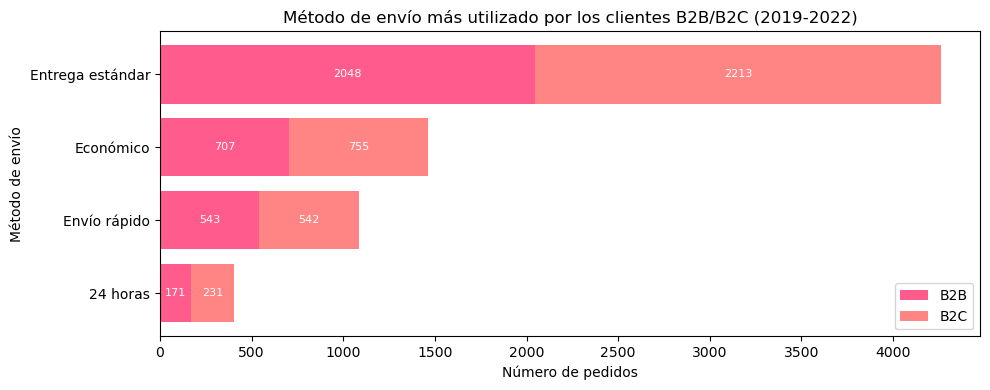

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Define las variables globales
global df_ventas, df_ventas_limpio

def pregunta_4():
    global df_ventas, df_ventas_limpio
    
    # Preparación de los datos
    df_modo_envio = df_ventas_limpio[['modo_envio', 'segmento_cliente']].copy()
    
    # Generar la tabla cruzada
    df_modo_envio = pd.crosstab(index=df_modo_envio['modo_envio'], columns=df_modo_envio['segmento_cliente']).sort_values("B2B")

    # Visualización
    colores = ['#6a0573', '#ab0476', '#ff5c8d', '#ff8484', '#ffc75f']
    fig, ax = plt.subplots(figsize=(10, 4))
    
    # Crear el gráfico de barras horizontal con colores específicos
    ax.barh(df_modo_envio.index, df_modo_envio['B2B'], color=colores[2], label='B2B')
    ax.barh(df_modo_envio.index, df_modo_envio['B2C'], left=df_modo_envio['B2B'], color=colores[3], label='B2C')

    # Colocar etiquetas dentro de cada segmento
    for i, container in enumerate(ax.containers):
        labels = [f'{v.get_width()}' if v.get_width() > 0 else '' for v in container]
        ax.bar_label(container, label_type='center', labels=labels, color='white', fontsize=8)

    # Establecer título y etiquetas de ejes
    ax.set_title('Método de envío más utilizado por los clientes B2B/B2C (2019-2022)')
    ax.set_xlabel('Número de pedidos')
    ax.set_ylabel('Método de envío')

    # Agregar leyenda
    ax.legend()

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

# Llamamos a la función para ejecutarla y visualizar el gráfico
pregunta_4()



**Pregunta 5**

C:\Users\Gat\AppData\Local\Temp\ipykernel_22440\530590580.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ventas_sp['fecha_pedido'] = pd.to_datetime(df_ventas_sp['fecha_pedido'])


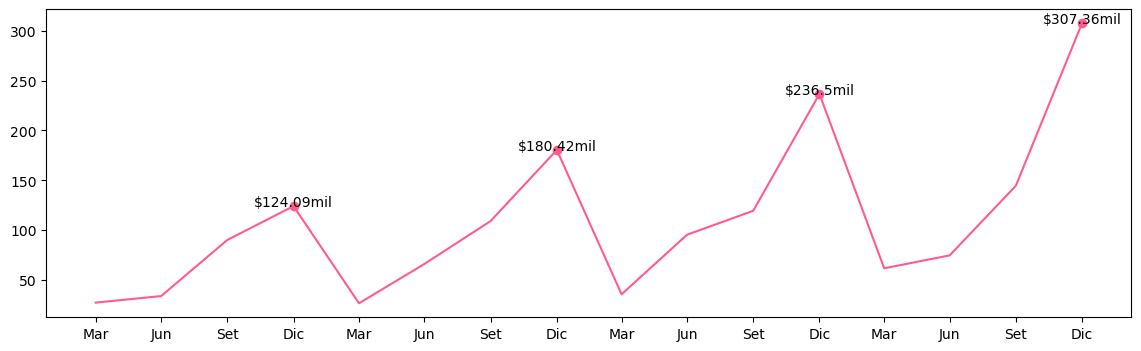

,fecha_pedido,total_venta
0,2019-03-31,27.38
1,2019-06-30,33.95
2,2019-09-30,90.21
3,2019-12-31,124.09
4,2020-03-31,26.73
5,2020-06-30,66.15
6,2020-09-30,109.18
7,2020-12-31,180.42
8,2021-03-31,35.74
9,2021-06-30,95.44


In [79]:
global df_ventas, df_ventas_limpio

def pregunta_5():
    global df_ventas, df_ventas_limpio
    
    # Preparación de los datos
    # Seleccionamos solo las filas correspondientes al estado de São Paulo
    df_ventas_sp = df_ventas_limpio[df_ventas_limpio['estado'] == 'São Paulo']
    
    # Convertimos 'fecha_pedido' a datetime y lo establecemos como índice
    df_ventas_sp['fecha_pedido'] = pd.to_datetime(df_ventas_sp['fecha_pedido'])
    df_ventas_sp.set_index('fecha_pedido', inplace=True)
    
    # Nos aseguramos de no incluir ninguna columna no numérica en la operación de suma
    # Solo sumamos la columna 'total_venta'
    df_ventas_trimestrales = df_ventas_sp[['total_venta']].resample('Q').sum()
    
    # Convertimos 'total_venta' a escala de miles y redondeamos
    df_ventas_trimestrales['total_venta'] = (df_ventas_trimestrales['total_venta'] / 1000).round(2)
    
    # Reseteamos el índice para usarlo en la visualización
    df_ventas_trimestrales.reset_index(inplace=True)
    
    # Visualización
    fig, ax = plt.subplots(figsize=(14,4))
    
    # Configuramos los puntos para marcar en el gráfico (solo los puntos del 4to trimestre)
    puntos_a_marcar = [True if (i+1) % 4 == 0 else False for i in range(len(df_ventas_trimestrales))]

    # Dibujamos el gráfico de líneas con el color deseado
    ax.plot(df_ventas_trimestrales['fecha_pedido'], df_ventas_trimestrales['total_venta'],
            marker="o", markevery=puntos_a_marcar, color="#ff5c8d")

    # Establecemos etiquetas personalizadas para el eje X
    x_labels = ["Mar", "Jun", "Set", "Dic"] * (len(df_ventas_trimestrales) // 4)
    ax.set_xticks(df_ventas_trimestrales['fecha_pedido'])
    ax.set_xticklabels(x_labels, ha="center")

    # Colocamos las etiquetas de valor solo en los puntos del 4to trimestre
    for i in range(3, len(df_ventas_trimestrales), 4):
        ax.text(df_ventas_trimestrales['fecha_pedido'][i], df_ventas_trimestrales['total_venta'][i] + 0.02,
                f"${df_ventas_trimestrales['total_venta'][i]}mil", ha='center')

    # Mostramos el gráfico
    plt.show()
    return df_ventas_trimestrales

# Llamamos a la función para probarla y mostramos los resultados
df_ventas_trimestrales = pregunta_5()
df_ventas_trimestrales


# 6.Calculando el margen de beneficio por producto y encontrando los 10 productos con mayor margen

- ¿Cuáles son los productos con el mayor margen de beneficio?
- ¿Cómo ha evolucionado la rentabilidad de los productos más populares a lo largo del tiempo?

Para esto, necesitamos calcular el margen de beneficio por producto y luego realizar un análisis temporal de la rentabilidad. Vamos a empezar calculando el margen de beneficio por producto y luego veremos la evolución de la rentabilidad de los productos más populares a lo largo del tiempo. 

Agregar el Cálculo del Margen de Beneficio

In [92]:
def resetear_indice_y_calcular_beneficio():
    global df_ventas_limpio
    df_ventas_limpio = df_ventas_limpio.reset_index(drop=True)
    df_ventas_limpio['margen_beneficio'] = (df_ventas_limpio['precio_unit_venta'] - df_ventas_limpio['precio_base']) * df_ventas_limpio['cantidad_pedido']
    print("Índice reseteado y margen de beneficio calculado:")
    print(df_ventas_limpio.head())


resetear_indice_y_calcular_beneficio()


Índice reseteado y margen de beneficio calculado:
  fecha_pedido fecha_envio        modo_envio     nombre_cliente  \
0   2021-11-09  2021-11-12         Económico    Thiago Silveira   
1   2021-11-09  2021-11-12         Económico    Thiago Silveira   
2   2021-06-13  2021-06-17         Económico      Giovanna Lima   
3   2020-10-12  2020-10-19  Entrega estándar  Ana Júlia da Cruz   
4   2019-06-10  2019-06-15  Entrega estándar        Sophia Dias   

  segmento_cliente          ciudad          estado   region  \
0              B2C  Ribeirão Preto       São Paulo  Sureste   
1              B2C  Ribeirão Preto       São Paulo  Sureste   
2              B2B  Rio de Janeiro  Rio de Janeiro  Sureste   
3              B2C   Foz do Iguaçu          Paraná      Sur   
4              B2C  Rio de Janeiro  Rio de Janeiro  Sureste   

   departamento_producto             tipo_producto  precio_base  \
0                   Ropa                 Camisetas       409.70   
1                   Ropa          

Crear Función para Calcular y Mostrar Productos con Mayores Márgenes de Beneficio

In [93]:
def calcular_y_mostrar_top_productos_beneficio(df_ventas):
    df_ventas['margen_beneficio'] = (df_ventas['precio_unit_venta'] - df_ventas['precio_base']) * df_ventas['cantidad_pedido']
    margen_beneficio_producto = df_ventas.groupby('tipo_producto')['margen_beneficio'].sum().sort_values(ascending=False)
    return margen_beneficio_producto.head(10)

top_10_productos_beneficio = calcular_y_mostrar_top_productos_beneficio(df_ventas_limpio)
print("Top 10 Productos con Mayor Margen de Beneficio:")
print(top_10_productos_beneficio)


Top 10 Productos con Mayor Margen de Beneficio:
tipo_producto
Lámparas LED             111453.41
Laptops                   91148.67
Cámaras digitales         80192.63
Smartphones               64705.58
Jeans                     55982.95
Detergente para ropas     55766.39
Bolsas de basura          53328.46
Papel higiénico           43546.05
Ambientador en spray      40976.16
Vestidos                  29784.63
Name: margen_beneficio, dtype: float64


Tras calcular el margen de beneficio por producto, hemos identificado los diez productos con los márgenes más altos en tu conjunto de datos. Estos productos y sus respectivos márgenes de beneficio acumulados son:

Lámparas LED             111453.41
Laptops                   91148.67
Cámaras digitales         80192.63
Smartphones               64705.58
Jeans                     55982.95
Detergente para ropas     55766.39
Bolsas de basura          53328.46
Papel higiénico           43546.05
Ambientador en spray      40976.16
Vestidos                  29784.63

Ahora, para entender cómo ha evolucionado la rentabilidad de los productos más populares a lo largo del tiempo, necesitamos realizar un análisis temporal. Vamos a concentrarnos en los tres productos con el mayor margen de beneficio  y examinar su rentabilidad a lo largo del tiempo. ​

<Figure size 1200x600 with 0 Axes>

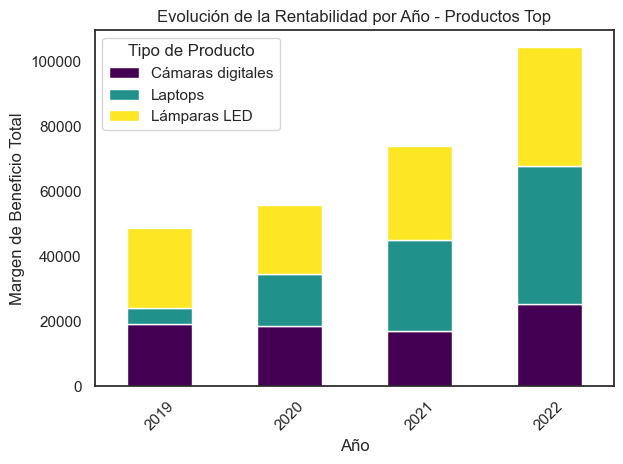

In [94]:
def visualizar_evolucion_rentabilidad_productos(df_ventas, productos_top):
    datos_productos_top = df_ventas[df_ventas['tipo_producto'].isin(productos_top)]
    datos_por_año_producto = datos_productos_top.groupby([datos_productos_top['fecha_pedido'].dt.year, 'tipo_producto'])['margen_beneficio'].sum().unstack()
    
    plt.figure(figsize=(12, 6))
    datos_por_año_producto.plot(kind='bar', stacked=True, colormap='viridis')
    plt.title('Evolución de la Rentabilidad por Año - Productos Top')
    plt.xlabel('Año')
    plt.ylabel('Margen de Beneficio Total')
    plt.xticks(rotation=45)
    plt.legend(title='Tipo de Producto')
    plt.tight_layout()
    plt.show()

productos_top = ['Lámparas LED' , 'Laptops', 'Cámaras digitales']
visualizar_evolucion_rentabilidad_productos(df_ventas_limpio, productos_top)


# 7.Análisis Geográfico Detallado

Además de Sao Paulo, ¿cómo se distribuyen las ventas en diferentes estados o ciudades?
¿Hay regiones con un rendimiento significativamente diferente?

Primero, analizaremos las ventas totales por estado.

In [95]:
def analisis_ventas_por_estado(df_ventas):
    ventas_por_estado = df_ventas.groupby('estado')['total_venta'].sum().sort_values(ascending=False)
    return ventas_por_estado

ventas_estado = analisis_ventas_por_estado(df_ventas_limpio)
print("Ventas Totales por Estado:")
print(ventas_estado)


Ventas Totales por Estado:
estado
São Paulo              1733616.75
Rio de Janeiro          886903.40
Ceará                   447361.69
Bahia                   432388.13
Pernambuco              306951.90
Minas Gerais            278177.98
Paraná                  210615.29
Goiás                   208652.66
Espírito Santo          124287.12
Distrito Federal        123952.31
Pará                    121448.39
Santa Catarina          104617.42
Amazonas                 94867.99
Maranhão                 87596.13
Alagoas                  80075.71
Piauí                    64153.40
Rondônia                 60239.76
Rio Grande do Norte      54706.65
Paraíba                  37643.30
Mato Grosso do Sur       32397.83
Amapá                    28659.03
Sergipe                  27046.00
Mato Grosso              16044.53
Acre                     14759.18
Roraima                  14711.66
Tocantins                13131.99
Name: total_venta, dtype: float64


Luego, analizaremos las ventas en diferentes ciudades.


In [96]:
def analisis_ventas_por_ciudad(df_ventas):
    ventas_por_ciudad = df_ventas.groupby('ciudad')['total_venta'].sum().sort_values(ascending=False)
    return ventas_por_ciudad

ventas_ciudad = analisis_ventas_por_ciudad(df_ventas_limpio)
print("Ventas Totales por Ciudad:")
print(ventas_ciudad)


Ventas Totales por Ciudad:
ciudad
São Paulo         797825.57
Rio de Janeiro    543812.73
Fortaleza         387452.52
Salvador          337763.74
Recife            145466.88
                    ...    
Itapetininga         385.10
Caraguatatuba        352.31
Pouso Alegre         332.09
Brusque              296.14
Itatiba              105.68
Name: total_venta, Length: 247, dtype: float64


Visualización de Ventas por Estado

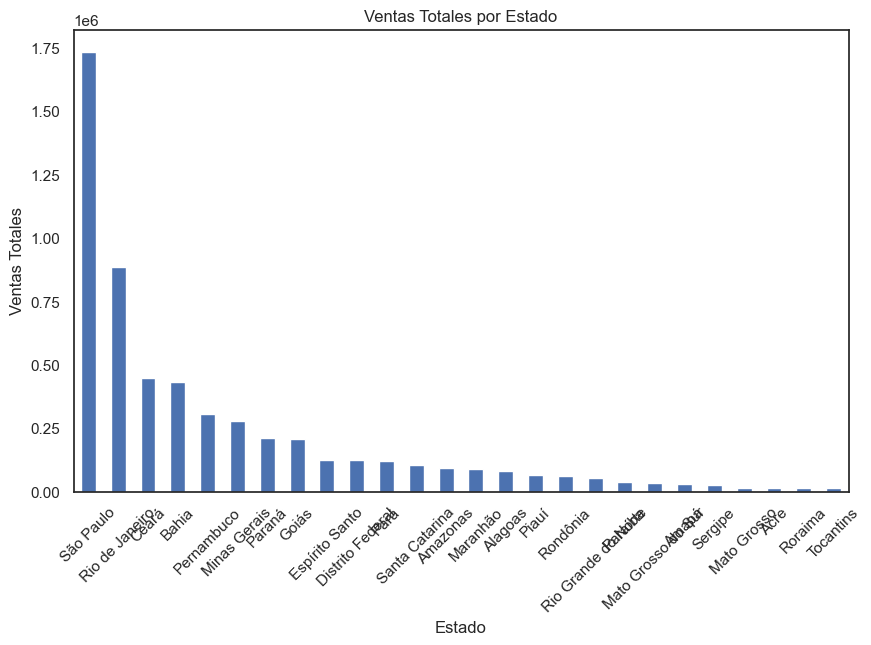

In [97]:
import matplotlib.pyplot as plt

def visualizar_ventas_por_estado(ventas_estado):
    plt.figure(figsize=(10, 6))
    ventas_estado.plot(kind='bar')
    plt.title('Ventas Totales por Estado')
    plt.xlabel('Estado')
    plt.ylabel('Ventas Totales')
    plt.xticks(rotation=45)
    plt.show()

visualizar_ventas_por_estado(ventas_estado)


Identificación de Regiones con Rendimientos Diferentes:

In [98]:
def comparar_rendimiento_regiones(ventas_estado):
    # Calcula el promedio de ventas para establecer un punto de comparación
    promedio_ventas = ventas_estado.mean()
    rendimiento_diferente = ventas_estado[ventas_estado > promedio_ventas]
    return rendimiento_diferente

rendimiento_diferente = comparar_rendimiento_regiones(ventas_estado)
print("Regiones con Rendimiento Significativamente Diferente:")
print(rendimiento_diferente)


Regiones con Rendimiento Significativamente Diferente:
estado
São Paulo         1733616.75
Rio de Janeiro     886903.40
Ceará              447361.69
Bahia              432388.13
Pernambuco         306951.90
Minas Gerais       278177.98
Name: total_venta, dtype: float64


Podemos observar las 4 regiones con más ventas, algunas observaciones sobre ellas:

São Paulo: Con ventas totales de $1,733,616.75, São Paulo lidera con una diferencia notable. Esto no es sorprendente, dado que São Paulo es conocido por ser el centro financiero y comercial más grande de Brasil, lo que probablemente influye en su alto volumen de ventas.

Rio de Janeiro: Este estado sigue a São Paulo con $886,903.40 en ventas totales. Rio de Janeiro, siendo otro gran centro urbano y turístico, muestra una fuerte actividad comercial, reflejada en sus altas ventas.

Ceará, Bahia y Pernambuco: Estos estados tienen ventas totales que oscilan entre $306,951.90 y $447,361.69. Aunque no están al mismo nivel que São Paulo o Rio de Janeiro, estos estados muestran un rendimiento significativo en el contexto nacional, lo que podría atribuirse a factores como el tamaño de la población, la actividad económica y la infraestructura comercial.

Minas Gerais: Con $278,177.98, Minas Gerais también se destaca, aunque sus ventas totales son menores en comparación con los líderes. Esto podría deberse a factores como un mercado consumidor más pequeño o diferencias en los patrones de consumo.

Las ventas en Brasil están fuertemente inclinadas hacia ciertos estados clave, y entender estos patrones es crucial para tomar decisiones estratégicas en áreas como marketing, expansión y operaciones.

Visualización Top 5 ciudad con mayor ganancias :

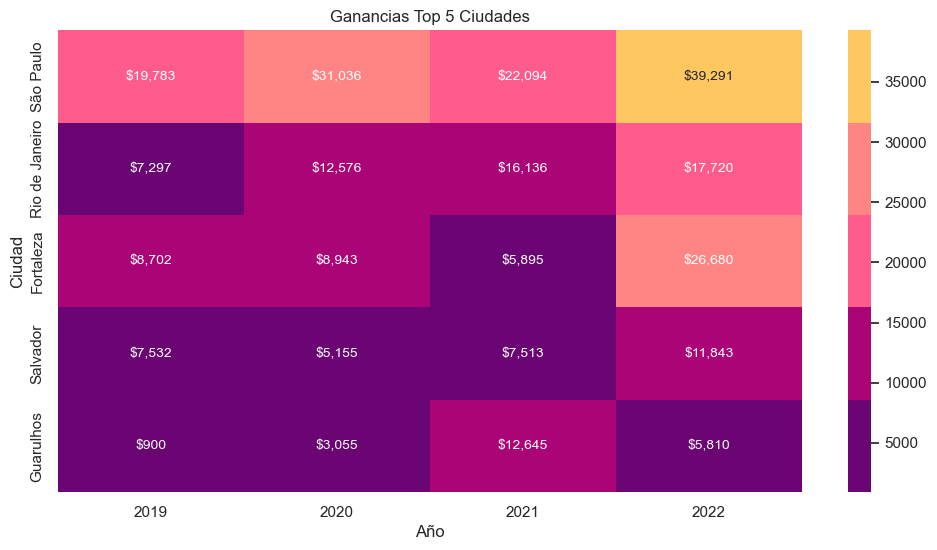

In [99]:
global ganancias_ciudad_año

#
colores = ['#6a0573', '#ab0476', '#ff5c8d', '#ff8484', '#ffc75f']

# Agrupar por ciudad y año
ganancias_ciudad_año = df_ventas_limpio.groupby(['ciudad', df_ventas_limpio['fecha_pedido'].dt.year]).agg({'total_ganancia':'sum'}).reset_index()

heatmap_data = ganancias_ciudad_año.pivot(index='ciudad', columns='fecha_pedido', values='total_ganancia').fillna(0)

# Seleccionar las top 5 ciudades por ganancia total para una mejor visualización
ganancias_por_ciudad = df_ventas_limpio.groupby('ciudad').agg({'total_ganancia':'sum'}).reset_index()
top_5_ciudades = ganancias_por_ciudad.nlargest(5, 'total_ganancia')['ciudad']
heatmap_data_top_5 = heatmap_data.loc[top_5_ciudades]

annot_matrix = heatmap_data_top_5.applymap(lambda x: "${:,.0f}".format(x))

sns.set(style="white")
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data_top_5, cmap=sns.color_palette(colores), annot=annot_matrix, fmt="", annot_kws={'size': 10})
plt.title('Ganancias Top 5 Ciudades')
plt.xlabel('Año')
plt.ylabel('Ciudad')
plt.show()

# 8.Comparación de Tendencias de Compra entre Clientes B2B y B2C:

¿Existen diferencias significativas en los patrones de compra entre clientes B2B y B2C?
¿Qué productos prefieren los clientes B2B en comparación con los B2C?

Para realizar una comparación de las tendencias de compra entre clientes B2B (Business-to-Business) y B2C (Business-to-Consumer), necesitamos analizar los datos considerando varios aspectos, como el volumen de ventas, los productos preferidos y las diferencias en los patrones de compra.

Comparar Volumen de Ventas B2B vs. B2C:

Primero, comparemos el volumen total de ventas entre clientes B2B y B2C.

In [100]:
def comparar_volumen_ventas(df_ventas):
    ventas_por_segmento = df_ventas.groupby('segmento_cliente')['total_venta'].sum()
    return ventas_por_segmento

ventas_segmento = comparar_volumen_ventas(df_ventas_limpio)
print("Ventas Totales por Segmento de Cliente (B2B vs B2C):")
print(ventas_segmento)


Ventas Totales por Segmento de Cliente (B2B vs B2C):
segmento_cliente
B2B    2784387.76
B2C    2820618.44
Name: total_venta, dtype: float64


Análisis de Productos Preferidos por B2B y B2C:

Luego, analizaremos qué productos son más populares entre los clientes B2B y B2C.

In [101]:
def productos_preferidos_por_segmento(df_ventas):
    productos_b2b = df_ventas[df_ventas['segmento_cliente'] == 'B2B'].groupby('tipo_producto')['total_venta'].sum().sort_values(ascending=False)
    productos_b2c = df_ventas[df_ventas['segmento_cliente'] == 'B2C'].groupby('tipo_producto')['total_venta'].sum().sort_values(ascending=False)
    return productos_b2b, productos_b2c

productos_b2b, productos_b2c = productos_preferidos_por_segmento(df_ventas_limpio)
print("Productos Preferidos por Clientes B2B:")
print(productos_b2b)
print("\nProductos Preferidos por Clientes B2C:")
print(productos_b2c)


Productos Preferidos por Clientes B2B:
tipo_producto
Cámaras digitales           435165.54
Jeans                       339935.44
Papel higiénico             315148.72
Laptops                     256050.95
Smartphones                 222143.29
Lámparas LED                219823.97
Detergente para ropas       197654.95
Ambientador en spray        159978.19
Zapatillas                  155541.65
Bolsas de basura            131310.11
Camisetas                   101896.17
Vestidos                     99672.49
Detergente para platos       60331.65
Limpiador de inodoros        38729.20
Limpiacristales              28898.60
Toallitas desinfectantes     18427.02
Cepillos de baño              3679.82
Name: total_venta, dtype: float64

Productos Preferidos por Clientes B2C:
tipo_producto
Cámaras digitales           465422.17
Jeans                       329875.37
Lámparas LED                323846.63
Smartphones                 250372.61
Papel higiénico             239972.10
Laptops                

Visualización de Diferencias en la Preferencia de Productos:

Podemos visualizar estas diferencias usando gráficos de barras para cada segmento.

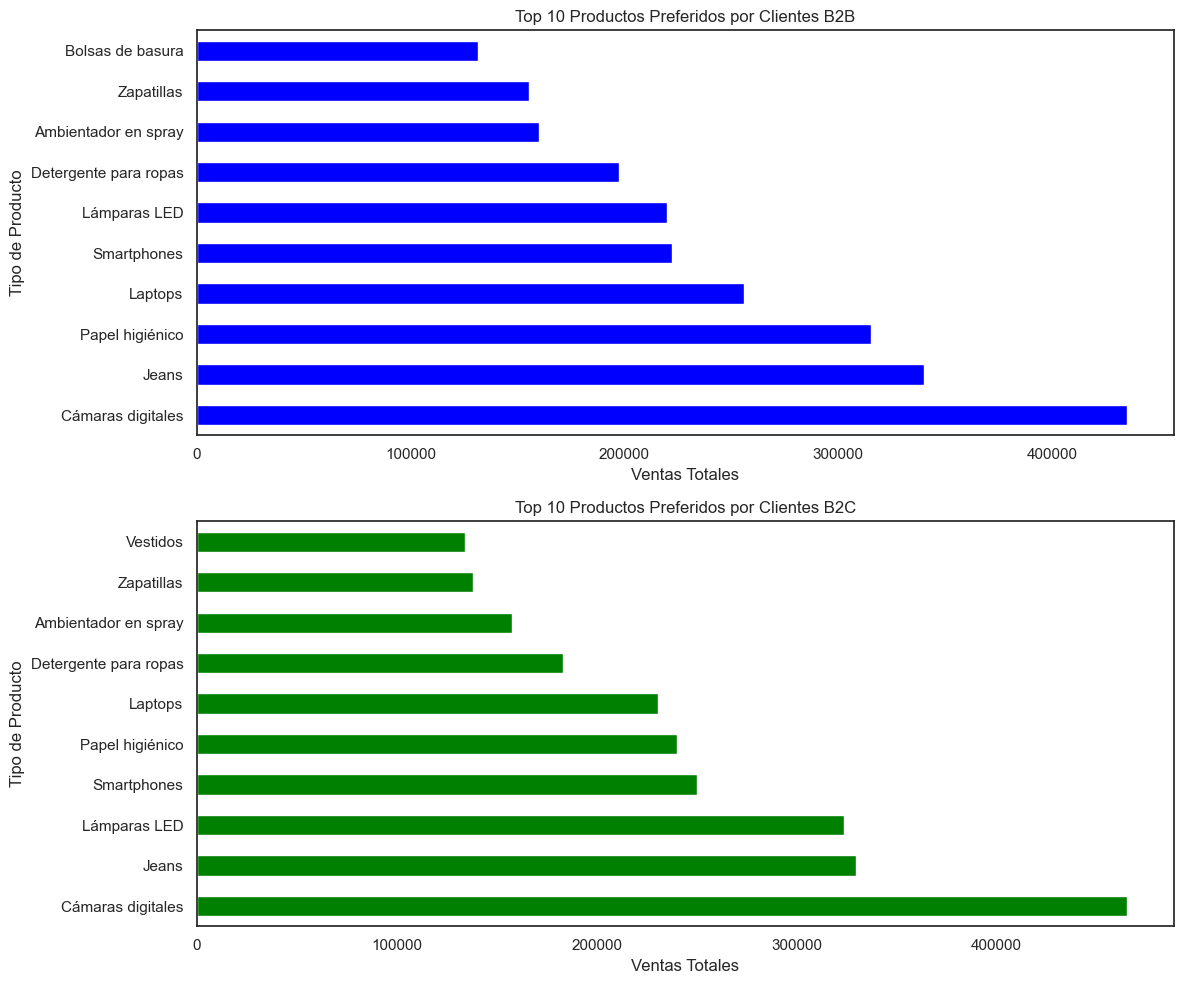

In [102]:
import matplotlib.pyplot as plt

def visualizar_preferencias_producto(productos_b2b, productos_b2c):
    fig, axs = plt.subplots(2, 1, figsize=(12, 10))

    productos_b2b.head(10).plot(kind='barh', ax=axs[0], color='blue')
    axs[0].set_title('Top 10 Productos Preferidos por Clientes B2B')
    axs[0].set_xlabel('Ventas Totales')
    axs[0].set_ylabel('Tipo de Producto')

    productos_b2c.head(10).plot(kind='barh', ax=axs[1], color='green')
    axs[1].set_title('Top 10 Productos Preferidos por Clientes B2C')
    axs[1].set_xlabel('Ventas Totales')
    axs[1].set_ylabel('Tipo de Producto')

    plt.tight_layout()
    plt.show()

visualizar_preferencias_producto(productos_b2b, productos_b2c)


 Ventas Totales por Segmento de Cliente:

1. Las ventas entre los segmentos B2B y B2C están muy equilibradas, con $2,784,387.76 para B2B y $2,820,618.44 para B2C. Esto indica una distribución bastante uniforme de la demanda entre ambos tipos de clientes.

2. Productos Preferidos por Clientes B2B:Los clientes B2B muestran una preferencia clara por productos tecnológicos y de uso cotidiano. Las "Cámaras digitales" y "Jeans" lideran en ventas, seguidos de cerca por "Papel higiénico" y "Laptops".
Los "Smartphones" y "Lámparas LED" también figuran entre los más vendidos, lo que sugiere que los clientes B2B pueden estar comprando estos productos tanto para uso empresarial como para reventa.
Productos de limpieza y artículos de uso diario como "Detergente para ropas", "Ambientador en spray" y "Bolsas de basura" también son populares, lo que puede indicar compras en volumen para oficinas o establecimientos comerciales. 

El análisis revela que aunque los volúmenes de ventas son similares entre B2B y B2C, las preferencias de productos varían significativamente, ofreciendo oportunidades únicas para estrategias de mercado dirigidas y gestión de inventario en cada segmento.